In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_auto = pd.read_csv("auto.csv", header=None)

print("Estrutura inicial:")
print(f"Número de linhas: {df_auto.shape[0]} e número de colunas: {df_auto.shape[1]}")
print("Tipos por coluna:")
print(df_auto.info())

print("Primeiras 5 linhas:")
display(df_auto.head())

Estrutura inicial:
Número de linhas: 205 e número de colunas: 26
Tipos por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       205 non-null    int64  
 1   1       205 non-null    object 
 2   2       205 non-null    object 
 3   3       205 non-null    object 
 4   4       205 non-null    object 
 5   5       205 non-null    object 
 6   6       205 non-null    object 
 7   7       205 non-null    object 
 8   8       205 non-null    object 
 9   9       205 non-null    float64
 10  10      205 non-null    float64
 11  11      205 non-null    float64
 12  12      205 non-null    float64
 13  13      205 non-null    int64  
 14  14      205 non-null    object 
 15  15      205 non-null    object 
 16  16      205 non-null    int64  
 17  17      205 non-null    object 
 18  18      205 non-null    object 
 19  19      205 non-null    object

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [59]:
nomes_colunas = [
    'symboling', 'normalizedLosses', 'make', 'fuelType', 'aspiration',
    'numOfDoors', 'bodyStyle', 'driveWheels', 'engineLocation',
    'wheelBase', 'length', 'width', 'height', 'curbWeight', 'engineType',
    'numOfCylinders', 'engineSize', 'fuelSystem', 'bore', 'stroke',
    'compressionRatio', 'horsepower', 'peakRpm', 'cityMpg', 'highwayMpg',
    'price']

df_auto.columns = nomes_colunas
print("Dataframe renomeado:")
display(df_auto.head())

Dataframe renomeado:


,symboling,normalizedLosses,make,fuelType,aspiration,numOfDoors,bodyStyle,driveWheels,engineLocation,wheelBase,...,engineSize,fuelSystem,bore,stroke,compressionRatio,horsepower,peakRpm,cityMpg,highwayMpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [60]:
df_auto.replace('?', np.nan, inplace=True)

print("Valores faltantes:")
print(df_auto.isnull().sum())

Valores faltantes:
symboling            0
normalizedLosses    41
make                 0
fuelType             0
aspiration           0
numOfDoors           2
bodyStyle            0
driveWheels          0
engineLocation       0
wheelBase            0
length               0
width                0
height               0
curbWeight           0
engineType           0
numOfCylinders       0
engineSize           0
fuelSystem           0
bore                 4
stroke               4
compressionRatio     0
horsepower           2
peakRpm              2
cityMpg              0
highwayMpg           0
price                4
dtype: int64


In [61]:
#Colunas numéricas substituindo pela média
colunas_numericas = ['bore', 'stroke', 'horsepower', 'peakRpm', 'price']
for col in colunas_numericas:
    df_auto[col] = pd.to_numeric(df_auto[col])
    media = df_auto[col].mean()
    # MODIFICAÇÃO: Atribui o resultado de fillna de volta à coluna
    df_auto[col] = df_auto[col].fillna(media)

#Coluna categórica substituindo pela moda
moda_portas = df_auto['numOfDoors'].mode()[0]
df_auto['numOfDoors'] = df_auto['numOfDoors'].fillna(moda_portas)

#Excluindo coluna com muitos dados faltantes
df_auto.drop('normalizedLosses', axis=1, inplace=True)

print("\\nContagem de Valores Faltantes Após o Tratamento:")
print(df_auto.isnull().sum())

\nContagem de Valores Faltantes Após o Tratamento:
symboling           0
make                0
fuelType            0
aspiration          0
numOfDoors          0
bodyStyle           0
driveWheels         0
engineLocation      0
wheelBase           0
length              0
width               0
height              0
curbWeight          0
engineType          0
numOfCylinders      0
engineSize          0
fuelSystem          0
bore                0
stroke              0
compressionRatio    0
horsepower          0
peakRpm             0
cityMpg             0
highwayMpg          0
price               0
dtype: int64


In [62]:
tabela_preco_medio = pd.pivot_table(df_auto,
                                    values='price',
                                    index='make',
                                    columns='bodyStyle',
                                    aggfunc='mean')

print("Preço médio por Fabricante e tipo de Carroceria:")
display(tabela_preco_medio.fillna(0).round(2))

Preço médio por Fabricante e tipo de Carroceria:


bodyStyle,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
alfa-romero,14997.5,0.00,16500.00,0.00,0.00
audi,0.0,0.00,13207.13,17647.00,18920.00
bmw,0.0,0.00,0.00,26118.75,0.00
chevrolet,0.0,0.00,5723.00,6575.00,0.00
dodge,0.0,0.00,7819.80,7619.67,8921.00
honda,0.0,0.00,7054.43,9945.00,7295.00
isuzu,0.0,0.00,11048.00,11066.42,0.00
jaguar,0.0,0.00,0.00,34600.00,0.00
mazda,0.0,0.00,10085.00,11464.14,0.00


In [63]:
colunas_analise = df_auto[['price', 'horsepower', 'cityMpg']]

print("Descritiva:")
display(colunas_analise.describe().round(2))

Descritiva:


,price,horsepower,cityMpg
count,205.00,205.00,205.00
mean,13207.13,104.26,25.22
std,7868.77,39.52,6.54
min,5118.00,48.00,13.00
25%,7788.00,70.00,19.00
50%,10595.00,95.00,24.00
75%,16500.00,116.00,30.00
max,45400.00,288.00,49.00


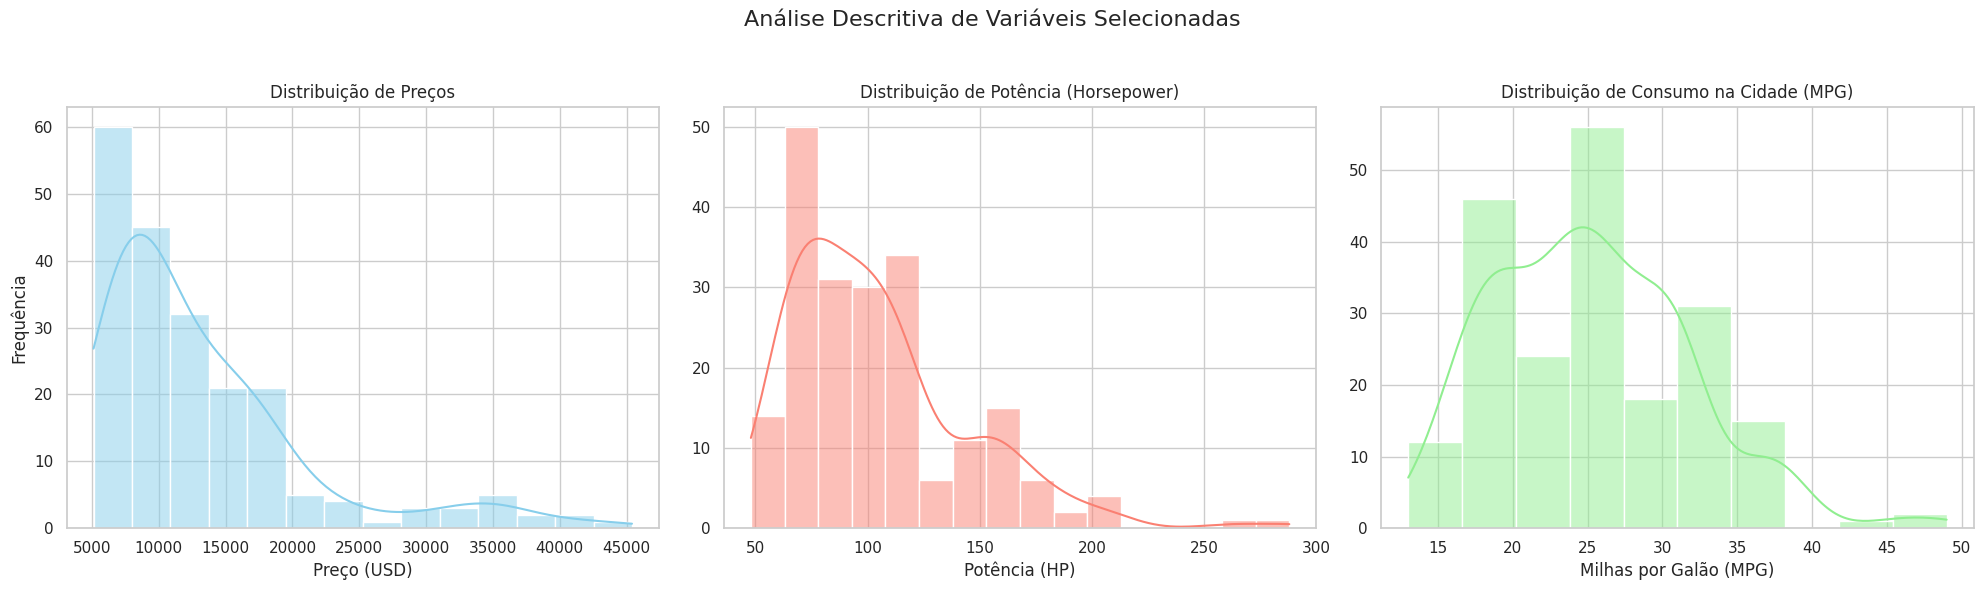

In [64]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Análise Descritiva de Variáveis Selecionadas', fontsize=16)


sns.histplot(colunas_analise['price'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribuição de Preços')
axes[0].set_xlabel('Preço (USD)')
axes[0].set_ylabel('Frequência')


sns.histplot(colunas_analise['horsepower'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribuição de Potência (Horsepower)')
axes[1].set_xlabel('Potência (HP)')
axes[1].set_ylabel('')

sns.histplot(colunas_analise['cityMpg'], kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Distribuição de Consumo na Cidade (MPG)')
axes[2].set_xlabel('Milhas por Galão (MPG)')
axes[2].set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Este conjunto de histogramas mostra a distribuição de três características principais dos veículos. Tanto o preço quanto a potência apresentam uma distribuição assimétrica à direita, o que significa que a maioria dos carros se concentra nas faixas de valores mais baixos, menos de 15.000 e abaixo de 150 HP, com poucos modelos sendo muito caros ou muito potentes. A distribuição do consumo na cidade (MPG) mostra que a faixa de eficiência mais comum para a maioria dos carros se concentra em torno de 25 milhas por galão.

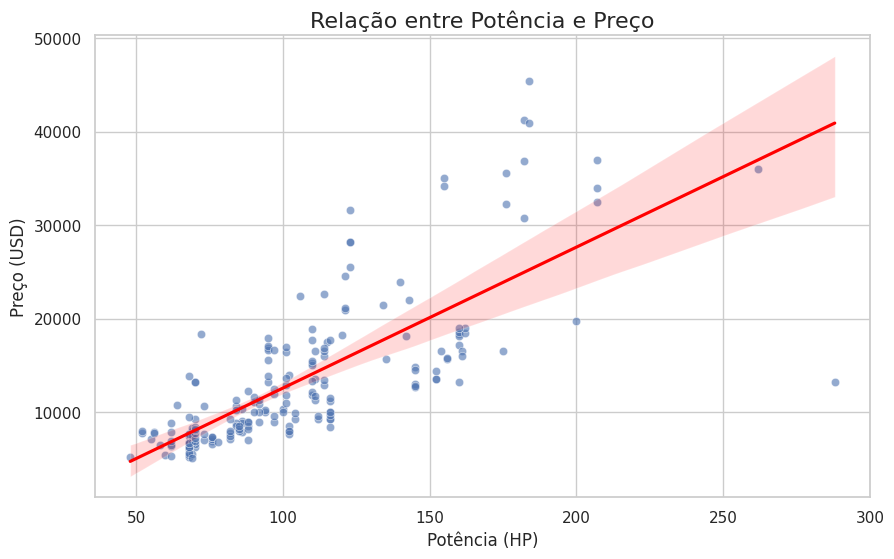

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_auto, x='horsepower', y='price', alpha=0.6)
sns.regplot(data=df_auto, x='horsepower', y='price', scatter=False, color='red') # Adiciona linha de regressão

plt.title('Relação entre Potência e Preço', fontsize=16)
plt.xlabel('Potência (HP)', fontsize=12)
plt.ylabel('Preço (USD)', fontsize=12)
plt.show()



Este gráfico de dispersão demonstra uma clara e positiva correlação linear entre a potência de um veículo e seu preço. Conforme a potência no eixo X aumenta, o preço no eixo Y também tende a subir, o que é confirmado pela linha de regressão vermelha ascendente. Isso indica que, de modo geral, carros com motores mais potentes são mais caros neste conjunto de dados.

